In [82]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('bestsellers with categories.csv')

In [3]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [4]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
df.shape

(550, 7)

In [6]:
df.isna().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [7]:
df[['User Rating','Reviews']].describe()

,User Rating,Reviews
count,550.000000,550.000000
mean,4.618364,11953.281818
std,0.226980,11731.132017
min,3.300000,37.000000
25%,4.500000,4058.000000
50%,4.700000,8580.000000
75%,4.800000,17253.250000
max,4.900000,87841.000000


In [8]:
df['Genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

### Fiction and Non Fiction Genres Count

In [9]:
fiction_count = df['Genre'][df['Genre'] == 'Fiction'].count()
non_fiction_count = 550 - fiction_count #or use df['Genre'][df['Genre'] == 'Non Fiction'].count()

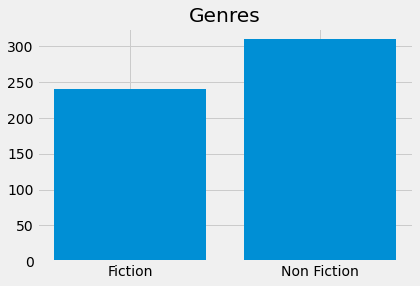

In [10]:
genres = [fiction_count, non_fiction_count]
x = ['Fiction', 'Non Fiction']
plt.style.use('fivethirtyeight')

plt.title('Genres')
plt.bar(x,genres)
plt.show()

### Ratings and Reviews  

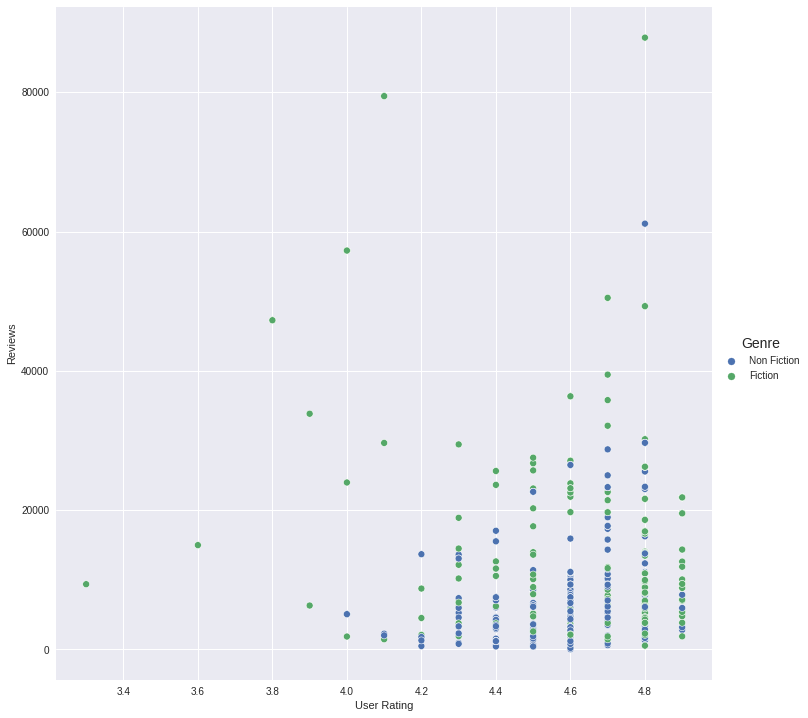

In [108]:
plt.style.use('seaborn')
sns.relplot(data=df, x='User Rating',y='Reviews',height=10,hue='Genre')
plt.show()

### Average Price of each year 

In [62]:
avg_prices = []
years = sorted(df['Year'].unique())

for year in years:
    avg_price = df['Price'][df['Year'] == year].mean()
    avg_prices.append(avg_price)

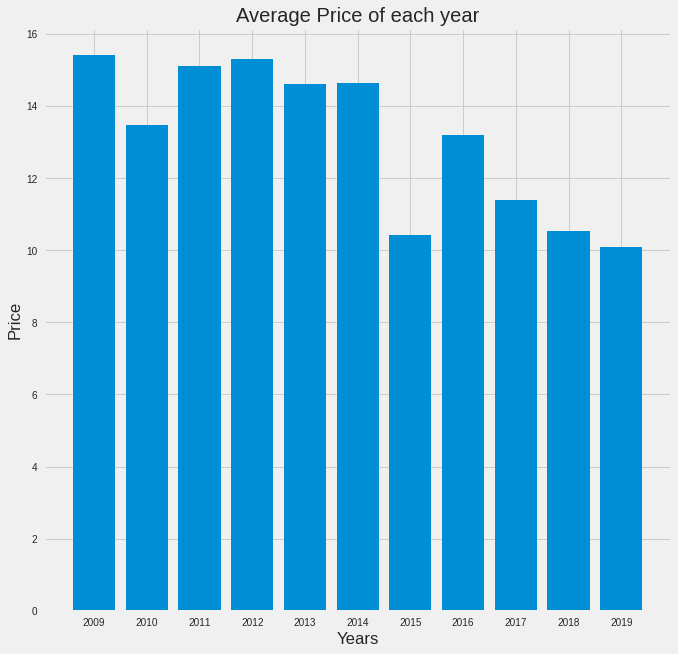

In [105]:

plt.style.use('fivethirtyeight')

plt.figure(figsize=(10,10))
plt.title('Average Price of each year')

plt.bar(years,avg_prices)

plt.xticks(years)

plt.xlabel('Years')
plt.ylabel('Price')
plt.show()

### Genres of each year. 

In [78]:
fic = []
non_fic = []
years = sorted(df['Year'].unique())

for year in years:
    f = df['Genre'][df['Year'] == year].value_counts()
    
    fic.append(f['Fiction'])
    non_fic.append(f['Non Fiction'])

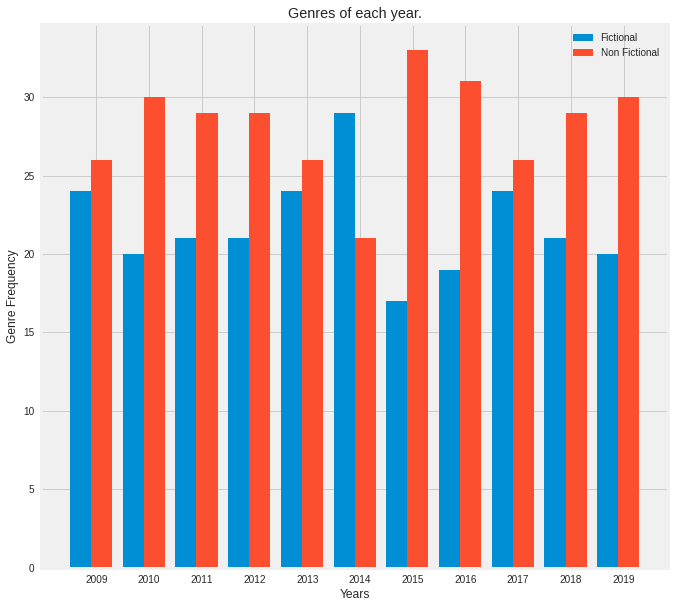

In [104]:
x_axis = np.arange(len(years))
plt.figure(figsize=(10,10))
plt.bar(x_axis-0.2,fic,0.4,label='Fictional')
plt.bar(x_axis+0.2,non_fic,0.4,label = 'Non Fictional')

plt.xticks(x_axis + 0.2/2,years,label='Non Fictional')

plt.title('Genres of each year.')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Genre Frequency')
plt.show()

### Authors who wrote 5 or more books 

In [180]:
authors = df['Author']

In [181]:
total_authors = authors.unique()

In [194]:
authors_books_frequency = authors.value_counts()[authors.value_counts() >= 5]

In [196]:
author_names = authors_books_frequency.keys()

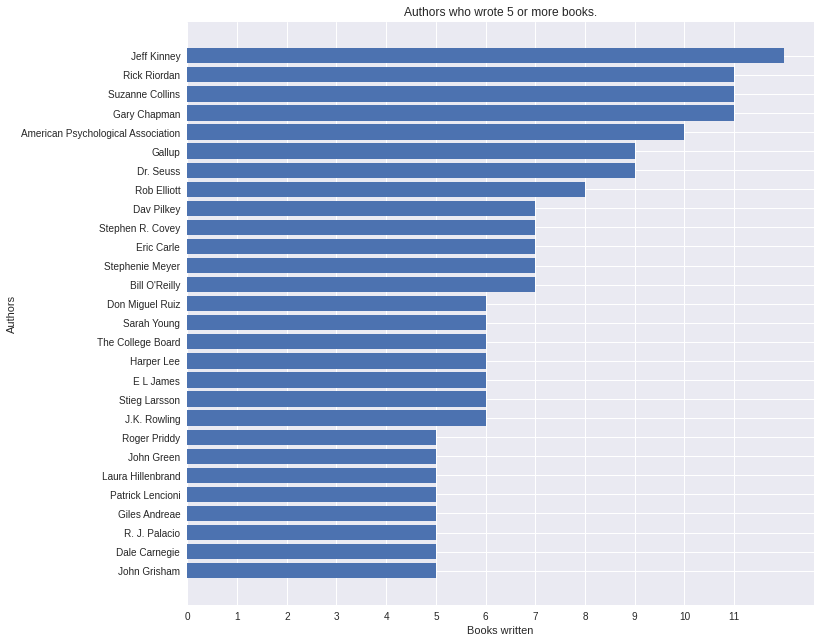

In [204]:
plt.figure(figsize=(10,10))
plt.barh(author_names, authors_books_frequency, 0.8)
plt.gca().invert_yaxis()

plt.xticks([i for i in range(12)])
plt.title('Authors who wrote 5 or more books.')
plt.xlabel('Books written')
plt.ylabel('Authors')
plt.show()